In [4]:
import pandas as pd 
%matplotlib inline
import numpy as np
import json
import requests 
import re
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Gathering

## CSV File Gathering

In [5]:
# Import the CSV file into a Panda DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

## TSV File Gathering

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = '.'
response = requests.get(url)
#response.content
with open (os.path.join(folder_name,url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)
# Import the TSV file into a Panda DataFrame

Image_predictions_df = pd.read_csv('image-predictions.tsv', delimiter='\t')


## API File Gathering

In [127]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
data = []
with open('tweet-json.txt') as f:
    api_df = pd.DataFrame(json.loads(line) for line in f)


# Assessing

In [8]:
archive_df.shape

(2356, 17)

In [9]:
Image_predictions_df.shape

(2075, 12)

In [10]:
api_df.shape

(2354, 31)

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Visual inspection of the dataframe
#archive_df.head()
archive_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
558,803321560782307329,NaN,NaN,2016-11-28 19:35:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Philbert. His toilet br...,7.677549e+17,4.196984e+09,2016-08-22 16:06:54 +0000,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None


In [13]:
sum(archive_df.tweet_id.duplicated())

0

In [14]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
archive_df[archive_df['rating_denominator'] > 10].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [17]:
archive_df['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
by            1
Zooey         1
light         1
Jed           1
Meatball      1
Name: name, Length: 957, dtype: int64

In [15]:
#archive_df[(archive_df['doggo'] == "None")&(archive_df['floofer'] == "None")&(archive_df['pupper'] == "None")&(archive_df['puppo'] == "None")]

In [18]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
Image_predictions_df.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1171,736365877722001409,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,cup,0.473555,False,toy_poodle,0.082606,True,consomme,0.048298,False


In [20]:
# Checking the entries which didn't predict any dog 
Image_predictions_df[(Image_predictions_df['p1_dog'] == False) & (Image_predictions_df['p2_dog'] == False) & (Image_predictions_df['p3_dog'] == False) ]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [21]:
sum(Image_predictions_df.duplicated())

0

In [22]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [23]:
api_df.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1831,Sun Dec 13 21:07:04 +0000 2015,676146341966438401,676146341966438401,This is Bert. He likes flowers. 10/10 https://...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676146336014667776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2077,False,False,False,False,en,NaN,NaN,NaN,NaN


In [24]:
api_df['lang'].value_counts()

en     2336
und       7
in        3
nl        3
es        1
eu        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [25]:
api_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


## Assessment Findings



### Archive_df
- rating_denominator/rating_numerator are not uniform/consistant , so rating is sometimes from 10 , others from 20 , others are from very big values like 170 
- rating_denominator = 0 will cause the rate to be infinity 
- Some names are missings , entered as "none" or "a" , "an" , "the"
- expanded_urls are missing in some entries so this means that no picture was included in the tweet
- doggo, floofer, pupper, and puppo as columns with Value = "None" 
- Dog Stage as a tidness issue should be used as a seperate column and have the value doggo, floofer, pupper, or puppo ..etc instead of having a seperate column for each stage
- timestamp is not in datetime format
- Archive_df and API datafarmes will be concatenated and merged into one new dataframe as an extra tidniess issue

### Image_predictions_df

- p1,p2,p3 ...etc. as column names are not descriptive
- Some pictures are not for dogs 


### API table

- lang and geo column names are not descriptive 
- "Created At" is not in datetime format

### General 

- Some Tweet ID's exist in one Datafram ( Data Source) but not in the others

# Cleaning

### Define Issue #1

1. Make a copy of each dataframe , let us start with archive_df
2. Make timestamp as datetime format


### Clean Issue #1

In [26]:
archive_df_clean = archive_df.copy()

In [27]:
archive_df_clean['timestamp']=pd.to_datetime(archive_df_clean['timestamp'])

### Test Issue #1

In [28]:
# Make sure that timestamp is now in datetime format
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define Issue #2

1. Drop the entries in Archive_df copy with NaN expanded_urls
2. Drop the entries in Archive_df copy which is having in_reply_to_status_id Or retweet_status_id
3. Fix the name of the last 4 columns ( None , a , an , the ) --> NaN
4. Since Image_predictions_df contains pictures only so we get the tweet ID's from it and filter out Archive_df using the Tweet ID and do the same for API_df
5. Make new Column called Stage which is the concatenation of the original 4 columns and its empty value , change it to NaN

### Clean Issue #2

In [29]:
archive_df_clean = archive_df_clean[archive_df_clean['expanded_urls'].notna()]

In [30]:
archive_df_clean = archive_df_clean[pd.isnull(archive_df_clean['in_reply_to_status_id'])]

In [31]:
archive_df_clean = archive_df_clean[pd.isnull(archive_df_clean['retweeted_status_id'])]

In [32]:
# assign the last four columns of the archive dataframe to its new value without None
archive_df_clean.iloc[:, -4:  ] = archive_df_clean.iloc[:, -4:  ].replace('None','')
archive_df_clean.iloc[:, -4:  ] = archive_df_clean.iloc[:, -4:  ].replace('a','')
archive_df_clean.iloc[:, -4:  ] = archive_df_clean.iloc[:, -4:  ].replace('an','')
archive_df_clean.iloc[:, -4:  ] = archive_df_clean.iloc[:, -4:  ].replace('the','')
#archive_df_clean[['doggo' , 'floofer' , 'pupper' , 'puppo']].sample()

In [33]:
# Make a new Column called Stage as a concatenation of the last 4 columns before turning their values to NaN
archive_df_clean['Stage'] = archive_df_clean['doggo'].str.cat(archive_df_clean['floofer']).str.cat(archive_df_clean['pupper']).str.cat(archive_df_clean['puppo'])

In [34]:
archive_df_clean['Stage']=archive_df_clean['Stage'].replace('',np.nan, regex=True)

### Test #2

In [35]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

### Define Issue #3

1. Make a copy of Image_predictions_df dataframe 
2. Get a list of of all unique tweet ID's from Image_predictions_df since we are 100% that they contain images and filter archive_df_clean using them and do the reverse with archive_df_clean to filter Image_predictions_df

### Clean Issue #3

In [36]:
Image_predictions_df_clean = Image_predictions_df.copy()

In [37]:
tweets_with_image = list(Image_predictions_df_clean.tweet_id.unique())
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

### Test Issue #3

In [38]:
archive_df_clean.info() ### Number of recorders became 1971

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

In [39]:
 Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define Issue#3.1

    1.Fix doggopupper --> doggo-pupper and other strange Stages

### Clean Issue#3.1

In [44]:
archive_df_clean['Stage'] = archive_df_clean['Stage'].replace('doggopupper','doggo-pupper')
archive_df_clean['Stage'] = archive_df_clean['Stage'].replace('doggopuppo','doggo-puppo')
archive_df_clean['Stage'] = archive_df_clean['Stage'].replace('doggofloofer','doggo-floofer')

### Test Issue#3.1

In [45]:
archive_df_clean['Stage'].value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: Stage, dtype: int64

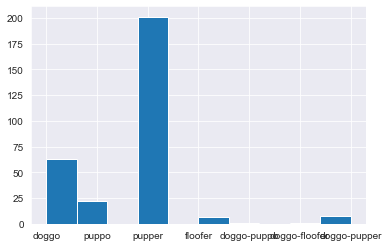

In [46]:
archive_df_clean['Stage'].hist();

### Define Issue #4

1. Check the numerator and deminotor again after the cleaning to see if we need further fix , Big values are still there so we need to remove those entries (Drop Columns with rating_numerator > 20 or rating_denominator not equal to 10)


### Clean Issue #4



In [47]:
# Re-inspect the rating_numerator and rating_denominator
archive_df_clean.describe() # Large values for rating_numerator and rating_denominator still exists 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,1.971000e+03,0.0,0.0,0.0,0.0,1971.000000,1971.000000
mean,7.360418e+17,NaN,NaN,NaN,NaN,12.223237,10.477423
std,6.752810e+16,NaN,NaN,NaN,NaN,41.634034,6.853275
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.758656e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.088343e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.880951e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


In [48]:
archive_df_clean['rating_denominator'].value_counts() # Zero Value was removed as per previous Cleaning efforts but still we have 170 / 150

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [49]:
archive_df_clean['rating_numerator'].value_counts() # Zero Value was removed as per previous Cleaning efforts

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [50]:
# Drop Columns with rating_numerator > 20 or rating_denominator not equal to 10
archive_df_clean=archive_df_clean[(archive_df_clean.rating_numerator < 20) | (archive_df_clean.rating_numerator == 10)]

### Test Issue #4

In [51]:
archive_df_clean.shape

(1953, 18)

### Define Issue #5

1 After dropping the entries from archive_df_clean which is having high num/dem , we get the tweet ID's and filter them again from the other 2 datafarmes after taking copies from them


### Clean Issue #5




In [52]:
tweets_with_image = list(archive_df_clean.tweet_id.unique())
Image_predictions_df_clean = Image_predictions_df_clean[Image_predictions_df_clean.tweet_id.isin(tweets_with_image)]

In [53]:
api_df_clean = api_df.copy()
tweets_with_image = list(archive_df_clean.tweet_id.unique())
api_df_clean = api_df_clean[api_df_clean.id.isin(tweets_with_image)]

In [54]:
tweets_with_image = list(api_df_clean.id.unique())
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

### Test Issue #5

In [55]:
Image_predictions_df_clean.shape

(1953, 12)

In [56]:
archive_df_clean.shape
api_df_clean.shape

(1953, 31)

### Define Issue#6

1. Chnage created_at to datetime format
2. Create Temp Dataframes before merging Archive and API datafarmes with the needed columns
3. Rename column "lang" --> language 
3. Create sepearte csv for them and merge them then read it back to the final dataframe 

### Clean issue#6

In [57]:
api_df_clean['created_at']=pd.to_datetime(api_df_clean['created_at'])

In [56]:
# Create Temp DF before merging with the needed columns 
#archive_df_clean_temp = archive_df_clean.loc[:, ['tweet_id', 'timestamp' , 'text' , 'rating_numerator' , 'rating_denominator' , 'name' , 'doggo' , 'floofer' , 'pupper' , 'puppo'] ] 
archive_df_clean_temp = archive_df_clean.loc[:, ['tweet_id', 'timestamp' , 'text' , 'rating_numerator' , 'rating_denominator' , 'name' , 'Stage'] ] 
api_df_clean_temp = api_df_clean.loc[:, ['id' , 'user' , 'retweet_count' , 'favorite_count' , 'lang' ]]
api_df_clean_temp.rename(columns={'lang':'language'}, inplace=True)
api_df_clean_temp.rename(columns={'id':'tweet_id'}, inplace=True)
archive_df_clean_temp.to_csv('archive_df_clean_temp.csv' , index = False)
api_df_clean_temp.to_csv('api_df_clean_temp.csv' , index = False)
#Twitter_archive_master_df.info()
#archive_df_clean_temp.info()
# Merge both DataFrames
Twitter_archive_master_df = pd.concat([api_df_clean_temp, archive_df_clean_temp], axis=1, sort=False)

### Test issue#6

In [55]:
Twitter_archive_master_df.info()
# Below Output was not correct so both CSV's were concatenated manually to genearte Twitter_archive_master_df.csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1953 non-null   float64            
 1   user                1953 non-null   object             
 2   retweet_count       1953 non-null   float64            
 3   favorite_count      1953 non-null   float64            
 4   language            1953 non-null   object             
 5   tweet_id            1953 non-null   float64            
 6   timestamp           1953 non-null   datetime64[ns, UTC]
 7   text                1953 non-null   object             
 8   rating_numerator    1953 non-null   float64            
 9   rating_denominator  1953 non-null   float64            
 10  name                1953 non-null   object             
 11  Stage               302 non-null    object             
dtypes: datetime64[ns, UTC](1), float64

In [59]:
Twitter_archive_master_df =pd.read_csv('Twitter_archive_master.csv')

In [60]:
Twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1953 non-null   float64
 1   timestamp           1953 non-null   object 
 2   text                1953 non-null   object 
 3   rating_numerator    1953 non-null   int64  
 4   rating_denominator  1953 non-null   int64  
 5   name                1953 non-null   object 
 6   Stage               302 non-null    object 
 7   tweet_id.1          1953 non-null   float64
 8   user                1953 non-null   object 
 9   retweet_count       1953 non-null   int64  
 10  favorite_count      1953 non-null   int64  
 11  language            1953 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 183.2+ KB


### Define Issue #7

Change timestamp in the new dataframe into datetime format since we will depend on it during the analysis

### Clean Issue #7

In [63]:
Twitter_archive_master_df['timestamp']=pd.to_datetime(Twitter_archive_master_df['timestamp'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1953 non-null   float64            
 1   timestamp           1953 non-null   datetime64[ns, UTC]
 2   text                1953 non-null   object             
 3   rating_numerator    1953 non-null   int64              
 4   rating_denominator  1953 non-null   int64              
 5   name                1953 non-null   object             
 6   Stage               302 non-null    object             
 7   tweet_id.1          1953 non-null   float64            
 8   user                1953 non-null   object             
 9   retweet_count       1953 non-null   int64              
 10  favorite_count      1953 non-null   int64              
 11  language            1953 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Test issue #7

In [ ]:
Twitter_archive_master_df.info()

### Define Issue #8

1. Fix the header names in Image_predictions_df_clean since they are not very describtive 
2. Reshaping the Image_prediction dataframe using wide_to_long in case needed for further changes in the future

### Clean Issue #8

In [64]:
Image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1953 non-null   int64  
 1   jpg_url   1953 non-null   object 
 2   img_num   1953 non-null   int64  
 3   p1        1953 non-null   object 
 4   p1_conf   1953 non-null   float64
 5   p1_dog    1953 non-null   bool   
 6   p2        1953 non-null   object 
 7   p2_conf   1953 non-null   float64
 8   p2_dog    1953 non-null   bool   
 9   p3        1953 non-null   object 
 10  p3_conf   1953 non-null   float64
 11  p3_dog    1953 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 158.3+ KB


In [119]:
# Getting Few Pictures for final report
    
url = Image_predictions_df_clean.jpg_url.sample(5)
folder_name = '.'

for i in url:
    response = requests.get(i)
    with open (os.path.join(folder_name,i.split('/')[-1]) , mode='wb') as file:
        file.write(response.content)

In [66]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
Image_predictions_df_clean.columns = cols

In [67]:
# Confirm No Further Predictions as Non Dog images
Image_predictions_df_clean[(Image_predictions_df_clean['prediction_1'] == False) & (Image_predictions_df_clean['prediction_2'] == False) & (Image_predictions_df_clean['prediction_3'] == False) ]

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3


In [71]:
# Reshaping the dataframe
Image_predictions_df_clean = pd.wide_to_long(Image_predictions_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test Issue #8

In [72]:
Image_predictions_df_clean.shape

(5859, 7)

In [102]:
Image_predictions_df_clean.sample()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
4927,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,2,Samoyed,0.023056,True


In [74]:
Image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5859 non-null   int64  
 1   jpg_url           5859 non-null   object 
 2   img_num           5859 non-null   int64  
 3   prediction_level  5859 non-null   int64  
 4   prediction        5859 non-null   object 
 5   confidence        5859 non-null   float64
 6   breed             5859 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 280.5+ KB


In [77]:
Image_predictions_df_clean.to_csv ('Image_predictions_Restructured.csv' , index = False)

# Visualization

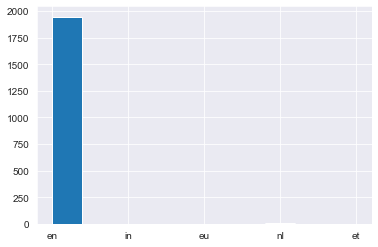

In [100]:
# Language Histogram
Twitter_archive_master_df['language'].hist();
# Tweets on WeRateDogs are more likely to be in English , Other Languages are neglibable 

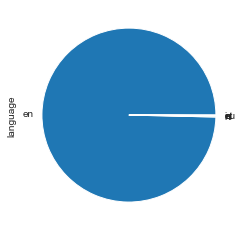

In [103]:
Twitter_archive_master_df['language'].value_counts().plot(kind= 'pie');

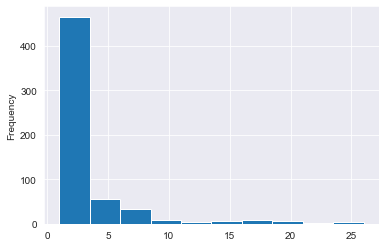

In [125]:
# Number of Tweets against time 

Year = pd.to_datetime(Twitter_archive_master_df['timestamp']).dt.to_period('Y')
Month = pd.to_datetime(Twitter_archive_master_df['timestamp']).dt.to_period('M')
Day = pd.to_datetime(Twitter_archive_master_df['timestamp']).dt.to_period('D')

Day.value_counts().sort_index().plot(kind= 'hist');

#plt.plot(Twitter_archive_master_df.tweet_id.count(), Twitter_archive_master_df.timestamp)
#plt.xticks(rotation='vertical')


In [160]:
Day.value_counts().sort_index()

2015-11-15     3
2015-11-16    25
2015-11-17    15
2015-11-18    17
2015-11-19    23
              ..
2017-07-28     2
2017-07-29     2
2017-07-30     1
2017-07-31     1
2017-08-01     2
Freq: D, Name: timestamp, Length: 595, dtype: int64

<AxesSubplot:>

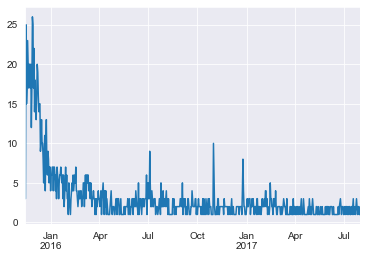

In [156]:
Day.value_counts().sort_index().plot()

In [138]:
# Mean of retweets per Dog Stage 
Twitter_archive_master_df.groupby('Stage').mean()['retweet_count']


Stage
doggo            7125.698413
doggofloofer     3433.000000
doggopupper      4397.250000
doggopuppo      19196.000000
floofer          4968.714286
pupper           2384.990000
puppo            6473.954545
Name: retweet_count, dtype: float64

In [139]:
# Mean of Favoritues per Dog Stage 
Twitter_archive_master_df.groupby('Stage').mean()['favorite_count']

Stage
doggo           19356.380952
doggofloofer    17169.000000
doggopupper     13219.875000
doggopuppo      47844.000000
floofer         13206.000000
pupper           7250.180000
puppo           21582.090909
Name: favorite_count, dtype: float64

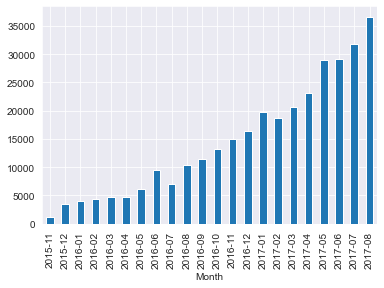

In [158]:
Twitter_archive_master_df['Month'] = pd.to_datetime(Twitter_archive_master_df['timestamp']).dt.to_period('M')
Twitter_archive_master_df.groupby('Month')['favorite_count'].mean().plot(kind = 'bar');


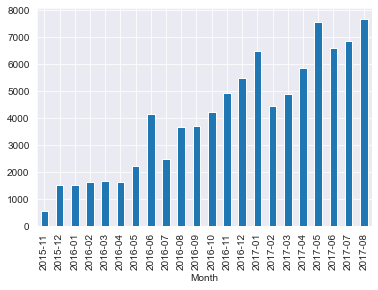

In [161]:
Twitter_archive_master_df.groupby('Month')['retweet_count'].mean().plot(kind = 'bar');

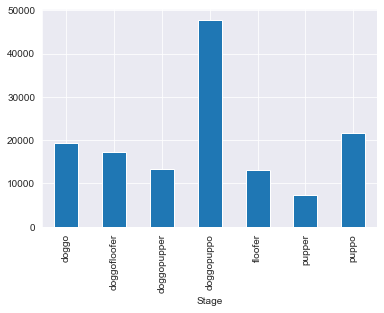

In [162]:
Twitter_archive_master_df.groupby('Stage')['favorite_count'].mean().plot(kind = 'bar');

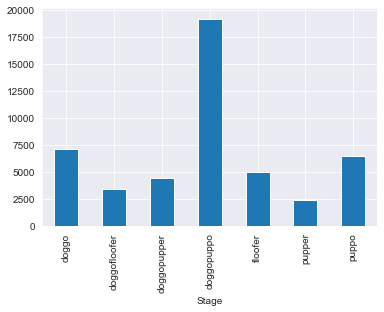

In [163]:
Twitter_archive_master_df.groupby('Stage')['retweet_count'].mean().plot(kind = 'bar');

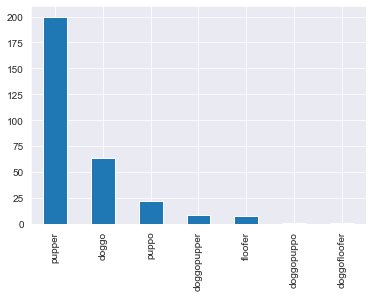

In [130]:
Twitter_archive_master_df.Stage.value_counts().plot(kind='bar');

### Insights 

1. Most Users who are following WeRateDogs account are tweeting in english , followors tweeting in other languages are very minor

2. When the WeRateDog account was launched , the rate of tweets was high then it started to degrade with time but on the other hand, we can see that the rate of retweet count and favorite count are increasing dramatically which is an indication that with the less contributions over time , there is much higher followers which are interacting more than the early stages of the account launch 
3. Also it is an indication that in the early stages , lots of followers where posting non Dog pictures or pictures with low quality (attracting less Favoirtes / retweets ) then later they started more funny and professional pictures for their favorite pet(s) with more interactions 

4. Followers are sharing pictures about their pets with their various stages, however combined pictures for doggo and puppo are getting more favorites and retweets then tweets containing either doggo or puppo comes in the second place 
